In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import joblib
sns.set(rc = {'figure.figsize':(12, 12)})

In [4]:
df = pd.read_csv('Diabetes.csv', na_values=['missing', 'xx', 'x', '?', '-'])
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [7]:
df.drop(['ID', 'No_Pation'], axis=1, inplace=True)
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


<Axes: xlabel='AGE'>

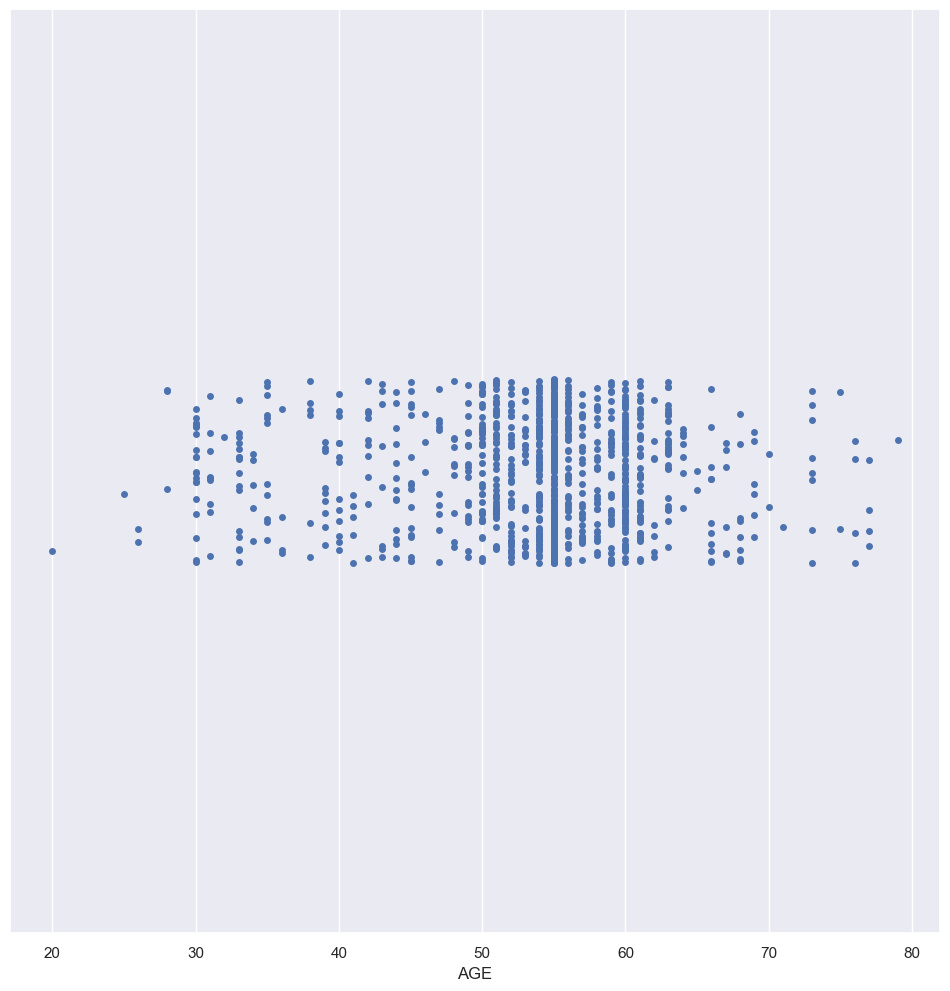

In [8]:
sns.stripplot(data=df, x='AGE')


In [9]:
df.loc[(df['AGE'] < 30) | (df['AGE'] > 70), 'AGE'] = np.nan


<Axes: xlabel='Urea'>

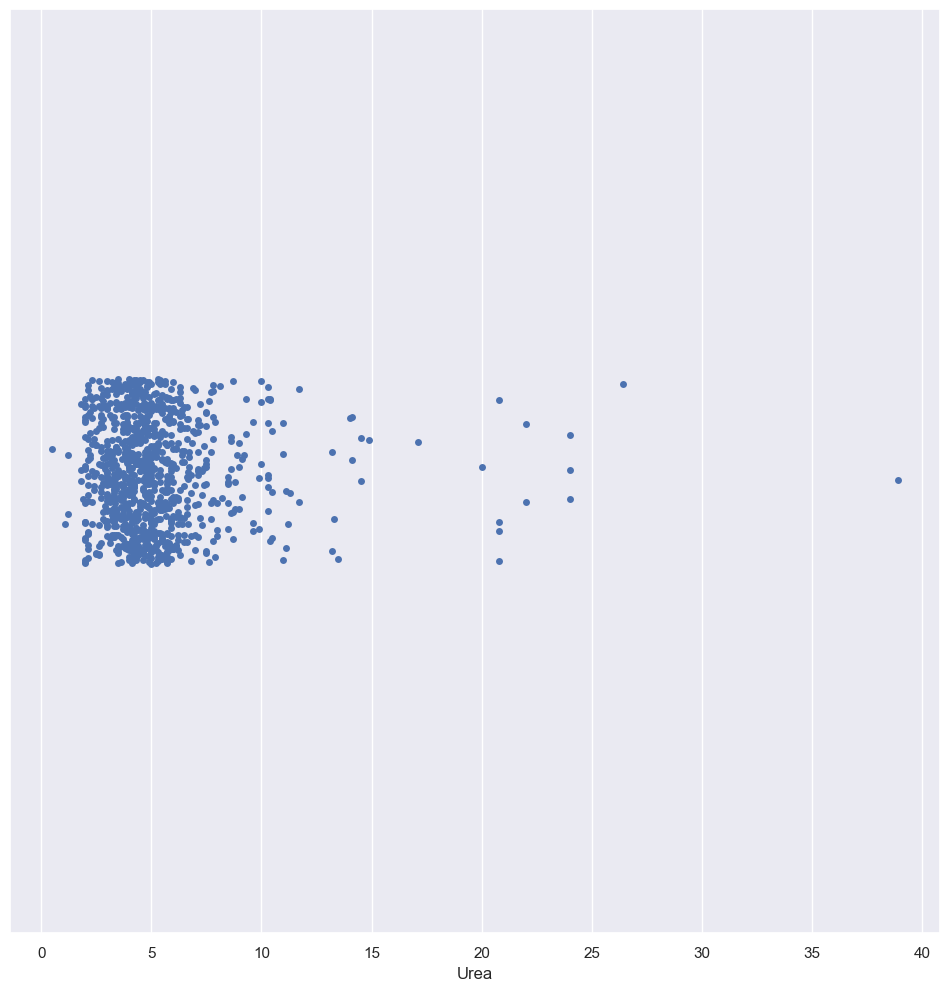

In [10]:
sns.stripplot(data=df, x='Urea')


<Axes: xlabel='Cr'>

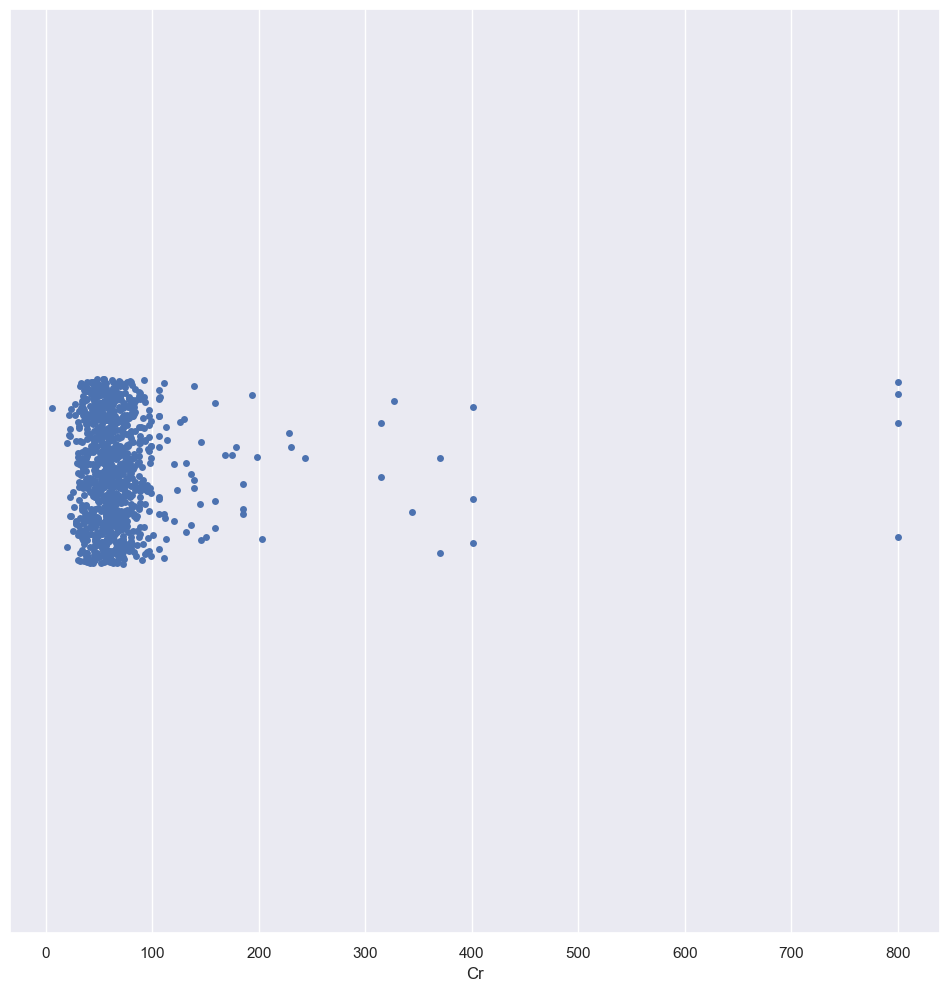

In [11]:
df.loc[(df['Urea'] < 2) | (df['Urea'] > 12), 'Urea'] = np.nan
sns.stripplot(data=df, x='Cr')


<Axes: xlabel='HbA1c'>

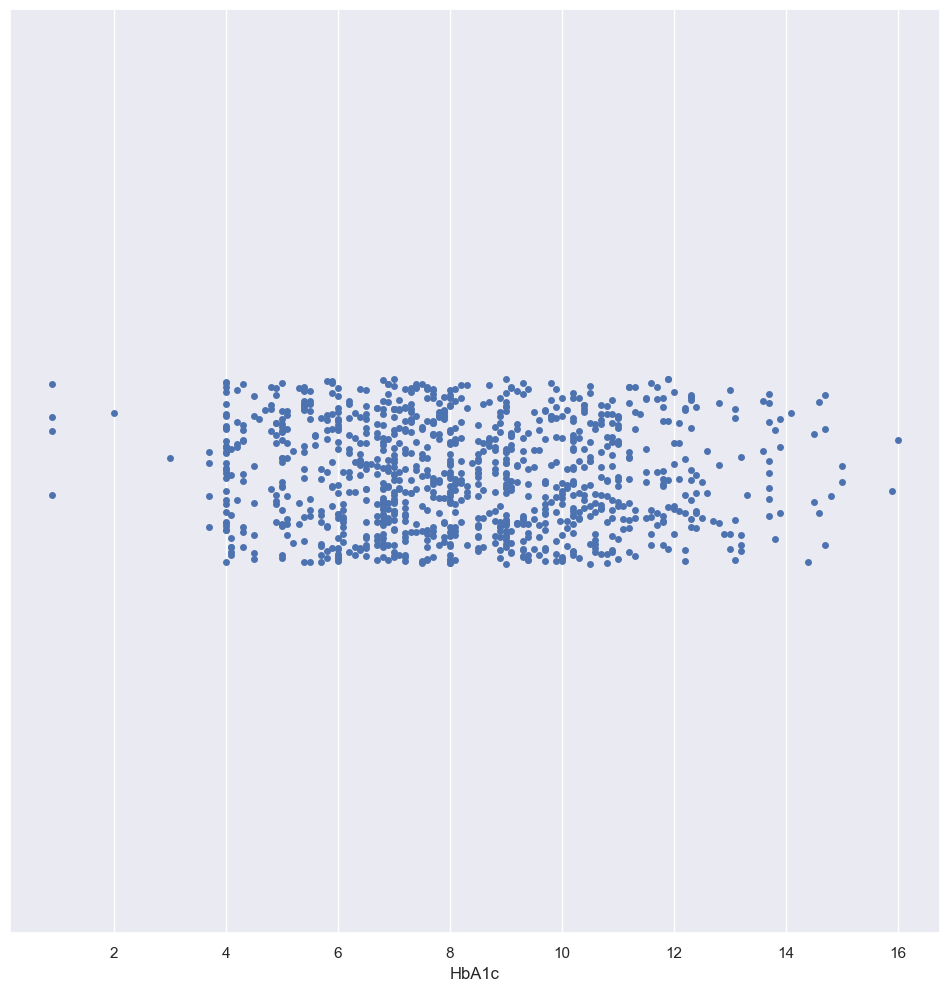

In [12]:
df.loc[(df['Cr'] < 15) | (df['Cr'] > 150), 'Cr'] = np.nan
sns.stripplot(data=df, x='HbA1c')


<Axes: xlabel='Chol'>

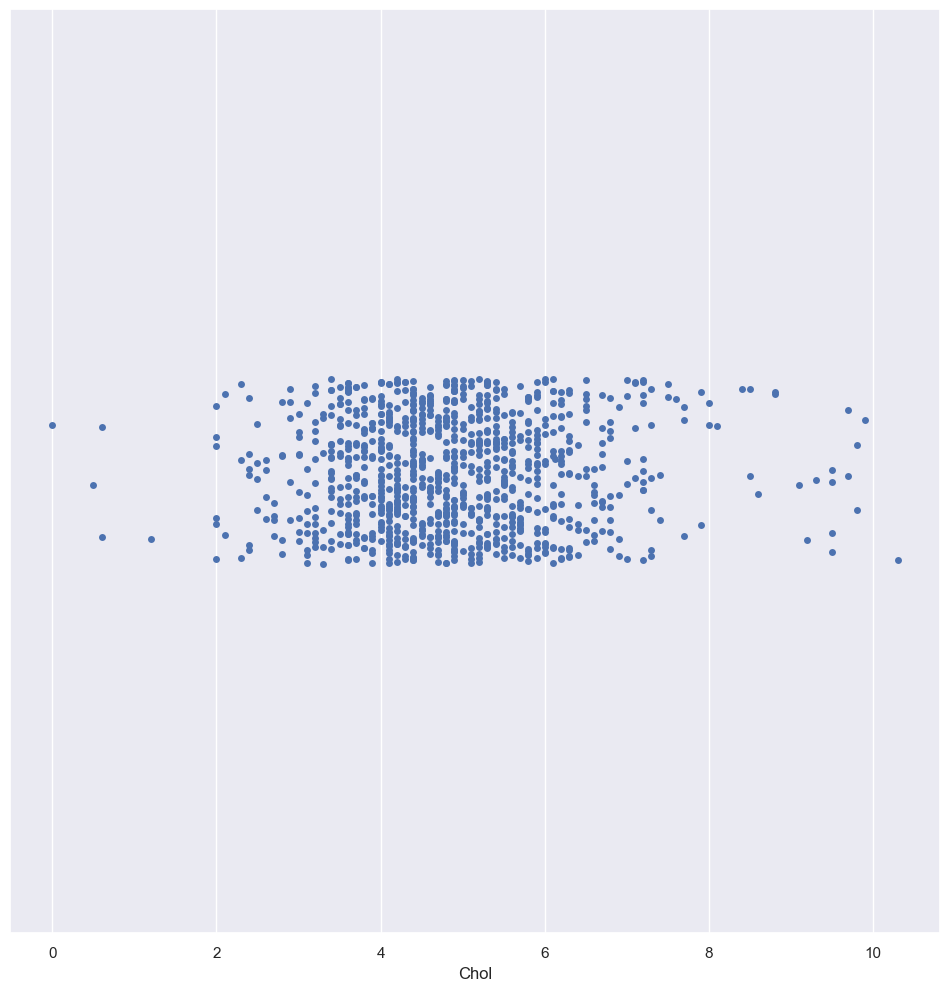

In [13]:
df.loc[(df['HbA1c'] < 4) | (df['HbA1c'] > 14), 'HbA1c'] = np.nan
sns.stripplot(data=df, x='Chol')


<Axes: xlabel='TG'>

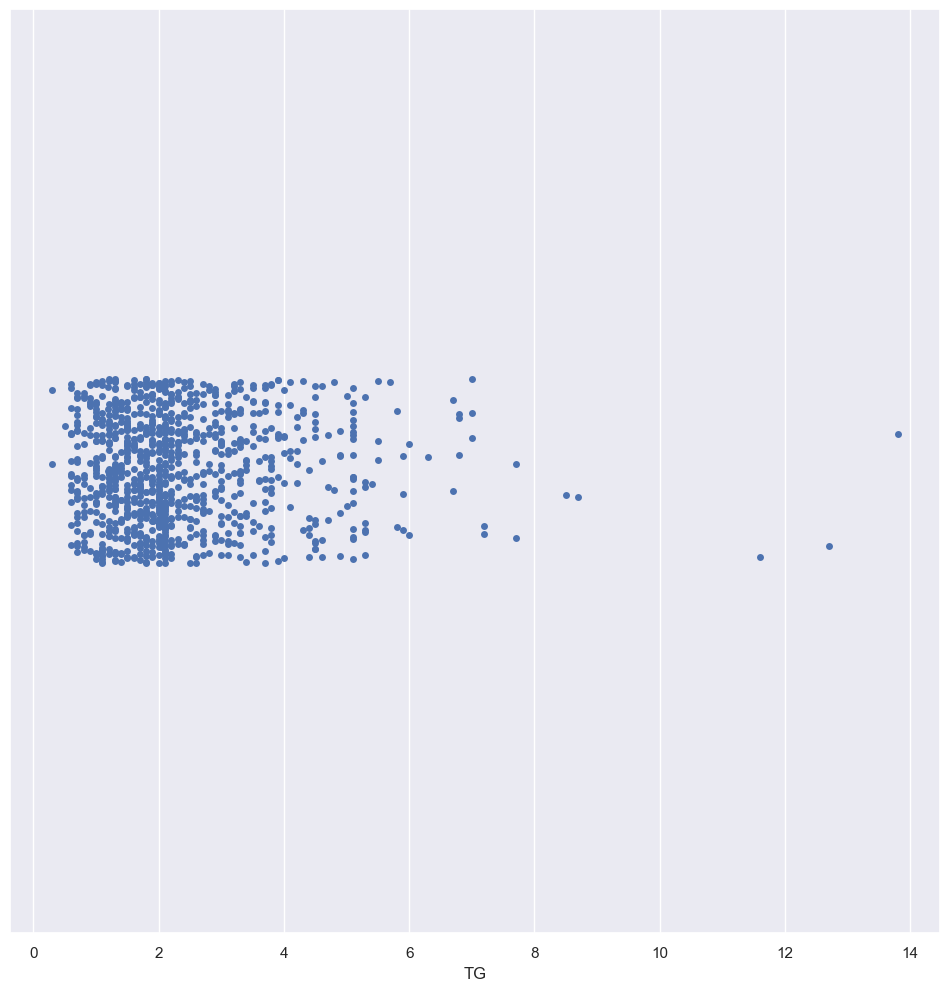

In [14]:
df.loc[(df['Chol'] < 2.2) | (df['Chol'] > 7.5), 'Chol'] = np.nan
sns.stripplot(data=df, x='TG')


<Axes: xlabel='HDL'>

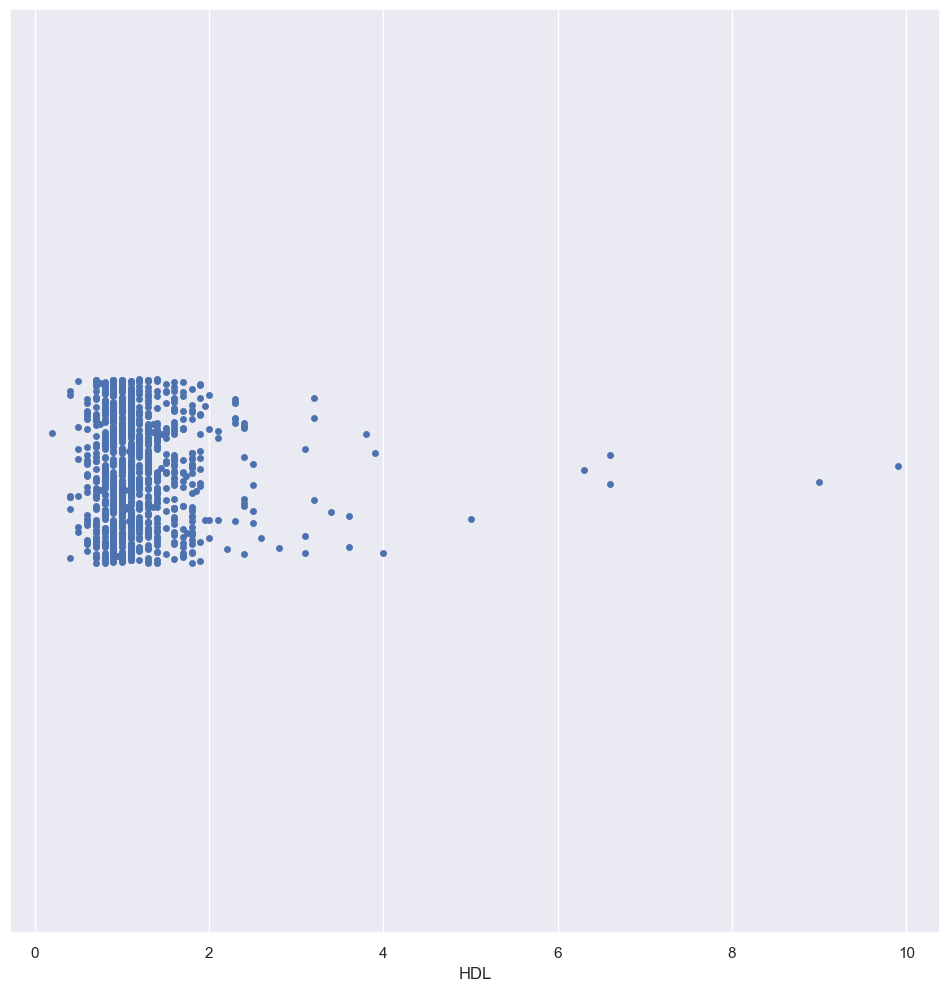

In [15]:
df.loc[(df['TG'] < 0.4) | (df['TG'] > 5.5), 'TG'] = np.nan
sns.stripplot(data=df, x='HDL')


<Axes: xlabel='LDL'>

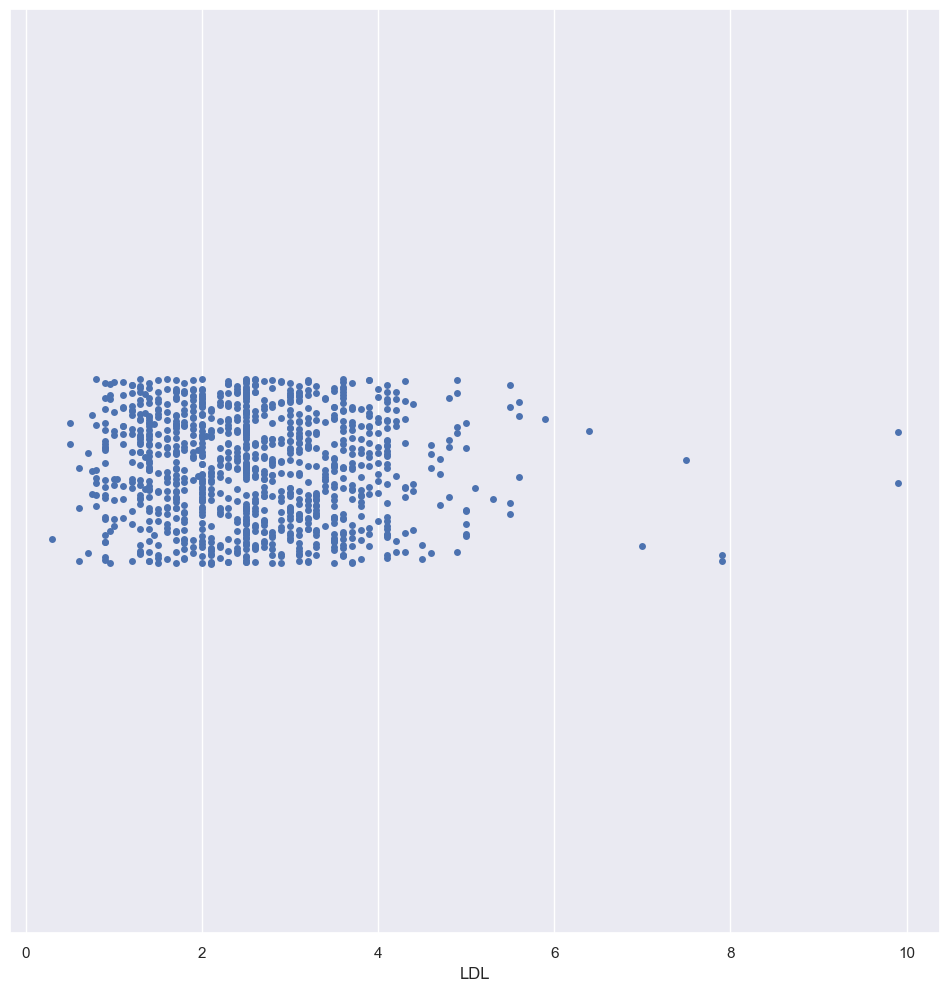

In [16]:
df.loc[df['HDL'] > 2.5, 'HDL'] = np.nan
sns.stripplot(data=df, x='LDL')


<Axes: xlabel='VLDL'>

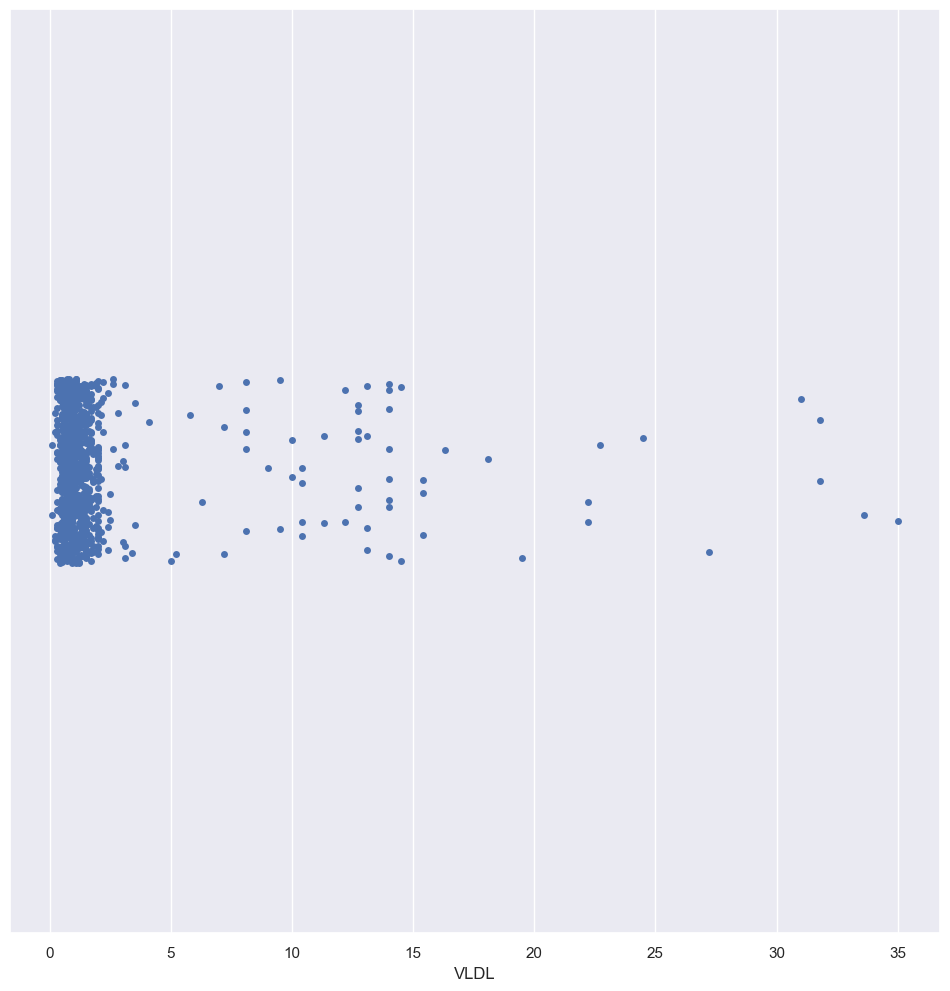

In [17]:
df.loc[(df['LDL'] < 0.7) | (df['LDL'] > 5.5), 'LDL'] = np.nan
sns.stripplot(data=df, x='VLDL')


<Axes: xlabel='BMI'>

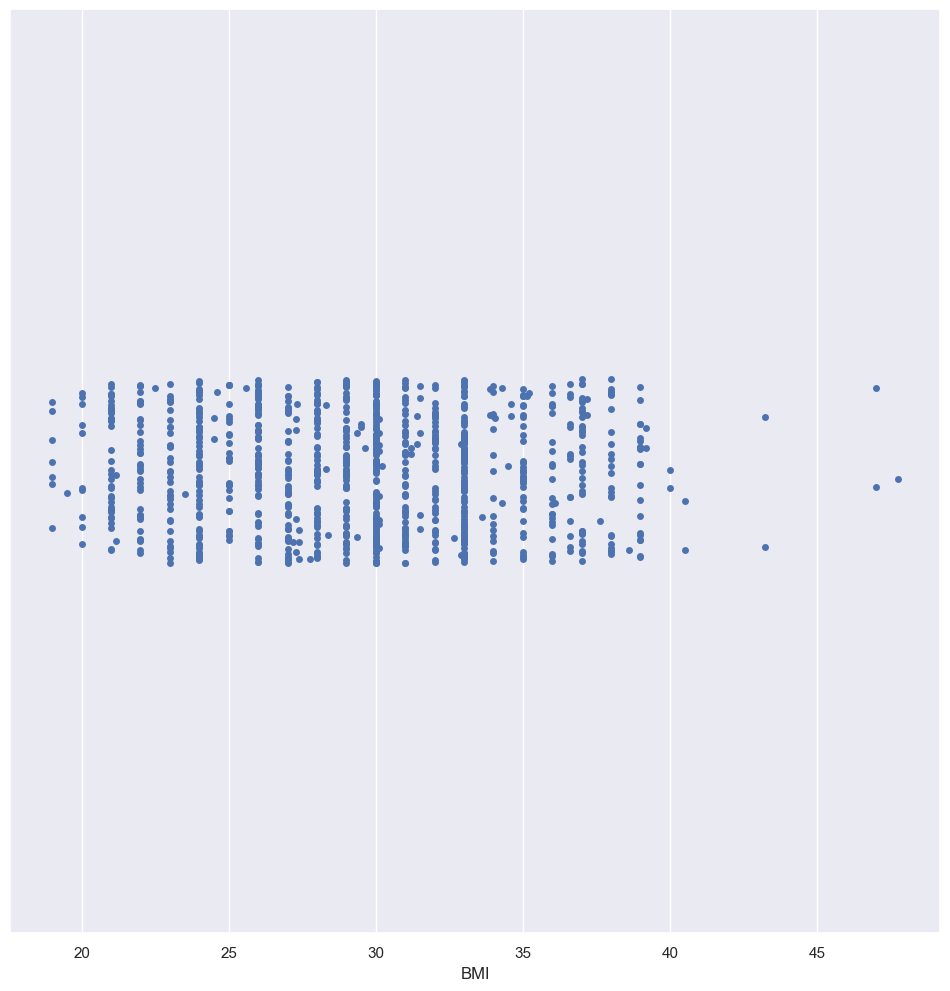

In [18]:
df.loc[df['VLDL'] > 4, 'VLDL'] = np.nan
sns.stripplot(data=df, x='BMI')


In [19]:
df.loc[(df['BMI'] < 18) | (df['BMI'] > 38.5), 'BMI'] = np.nan


In [20]:
df.isna().sum()


Gender     0
AGE       27
Urea      31
Cr        29
HbA1c     24
Chol      41
TG        28
HDL       20
LDL       17
VLDL      62
BMI       34
CLASS      0
dtype: int64

In [21]:
imputer = KNNImputer()
for col in df.columns[1:-1]:
    df[col] = imputer.fit_transform(df[[col]])

In [22]:
df.isna().sum()

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

In [23]:
def handle_output(output):
    return 1 if 'Y' in output else 0

df['CLASS'] = df['CLASS'].apply(handle_output)

In [24]:
df['Gender'] = df['Gender'].apply(str.upper)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Gender_M
0,50.000000,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.500000,24.000000,0,False
1,53.289825,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.600000,23.000000,0,True
2,50.000000,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.500000,24.000000,0,False
3,50.000000,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.500000,24.000000,0,False
4,33.000000,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.400000,21.000000,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,53.289825,11.0,97.0,7.0,7.5,1.7,1.2,1.8,0.600000,30.000000,1,True
996,31.000000,3.0,60.0,12.3,4.1,2.2,0.7,2.4,1.042751,37.200000,1,True
997,30.000000,7.1,81.0,6.7,4.1,1.1,1.2,2.4,1.042751,27.400000,1,True
998,38.000000,5.8,59.0,6.7,5.3,2.0,1.6,2.9,1.042751,29.206822,1,True


<Axes: >

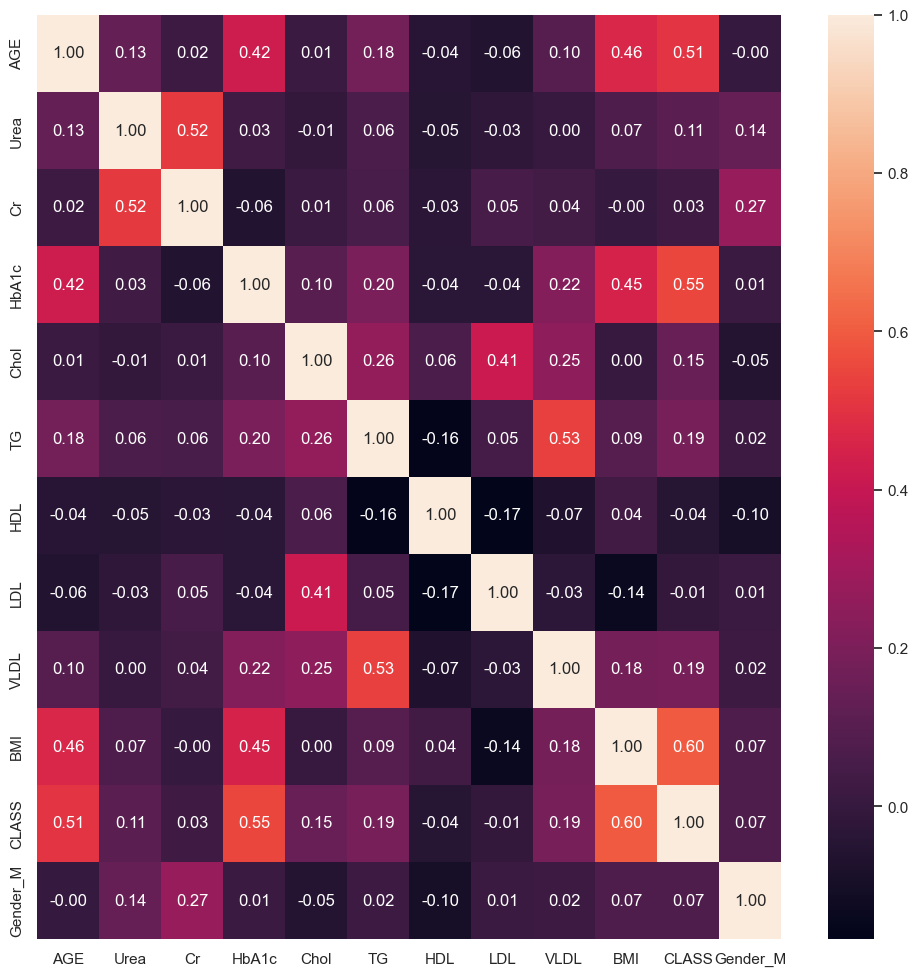

In [25]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f')


In [26]:
df.drop(['Cr', 'HDL', 'LDL', 'Gender_M'], axis=1, inplace=True)


In [27]:
x = df.drop('CLASS', axis=1)
y = df['CLASS']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=32)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 7)
(750,)
(250, 7)
(250,)


In [30]:
y_train.value_counts()


CLASS
1    638
0    112
Name: count, dtype: int64

In [31]:
sampler = SMOTE()
x_train, y_train = sampler.fit_resample(x_train, y_train)
y_train.value_counts()

CLASS
0    638
1    638
Name: count, dtype: int64

In [32]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [34]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [35]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print('-'*30)

Training Model LR 
--------------
Training Accuracy: 0.9545454545454546
Testing Accuracy: 0.928
Testing Confusion Matrix: 
[[ 42   2]
 [ 16 190]]
Testing Recall: 0.9223300970873787
Testing Precesion: 0.9895833333333334
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9733542319749217
Testing Accuracy: 0.96
Testing Confusion Matrix: 
[[ 43   1]
 [  9 197]]
Testing Recall: 0.9563106796116505
Testing Precesion: 0.9949494949494949
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.9788401253918495
Testing Accuracy: 0.956
Testing Confusion Matrix: 
[[ 40   4]
 [  7 199]]
Testing Recall: 0.9660194174757282
Testing Precesion: 0.9802955665024631
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.976
Testing Confusion Matrix: 
[[ 42   2]
 [  4 202]]
Testing Recall: 0.9805825242718447
Testing Precesion: 0.9901960784313726
------------------------------
Training Model

In [36]:
joblib.dump(scaler, 'signs_scaler.h5')
joblib.dump(model, 'signs_model.h5')

['signs_model.h5']